# Project Title:Customer Segmentation Visualization & Advanced Analysis
# Project Overview:
### The project aims to analyze customer churn in a telecommunications  company and develop predictive models to identify at-risk customers.
### The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention

# TASK 1: Understanding the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\Telco_Customer_Churn_Dataset  (3).csv")   

# Display first 10 rows
print(" First 10 rows of dataset:")
print(df.head(10))

# Show dataset shape (rows, columns)
print("\n Dataset shape (rows, columns):", df.shape)

# Show data types of each column
print("\n Data types of each column:")
print(df.dtypes)

# Show missing values
print("\n Missing values in each column:")
print(df.isnull().sum())

# Show basic information about dataset
print("\n Dataset info:")
print(df.info())


 First 10 rows of dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone serv

# TASK 2: Data Cleaning

In [2]:
import numpy as np

# Make a copy of dataset
clean = df.copy()

# Clean column names
clean.columns = [c.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for c in clean.columns]

# Convert 'totalcharges' to numeric
clean['totalcharges'] = clean['totalcharges'].replace(r'^\s*$', np.nan, regex=True)
clean['totalcharges'] = pd.to_numeric(clean['totalcharges'], errors='coerce')

# Handle missing values safely (no inplace warnings)
num_cols = clean.select_dtypes(include=[np.number]).columns
cat_cols = clean.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    if clean[col].isnull().sum() > 0:
        clean[col] = clean[col].fillna(clean[col].median())   # changed method

for col in cat_cols:
    if clean[col].isnull().sum() > 0:
        clean[col] = clean[col].fillna(clean[col].mode()[0])  # changed method

# Remove duplicates
clean = clean.drop_duplicates()

# Clean churn column
clean['churn'] = clean['churn'].astype(str).str.strip().str.lower().replace({'yes': 'Yes', 'no': 'No'})

# Create Tenure Buckets
bins = [0, 12, 36, 1000]
labels = ['0-12', '13-36', '37+']
clean['tenure_bucket'] = pd.cut(clean['tenure'], bins=bins, labels=labels, include_lowest=True)

# Save cleaned dataset
clean.to_csv("cleaned_telco.csv", index=False)
print("✅ Data cleaning complete! Saved as 'cleaned_telco.csv'")


✅ Data cleaning complete! Saved as 'cleaned_telco.csv'


# TASK 3: Exploratory Data Analysis (EDA)

Summary statistics:
       seniorcitizen       tenure  monthlycharges  totalcharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


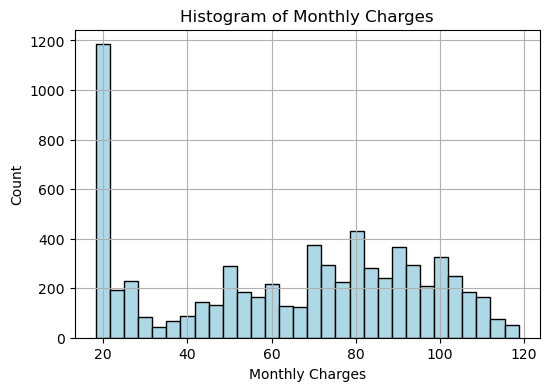

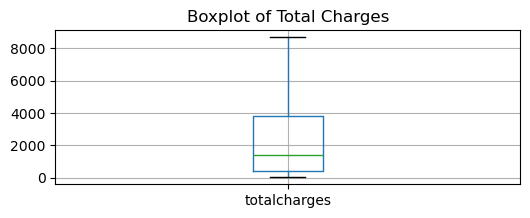


 Churn Count:
churn
No     5174
Yes    1869
Name: count, dtype: int64

 Churn Proportion:
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# Summary statistics for numerical columns
print("Summary statistics:")
print(clean.describe())

# Histogram for MonthlyCharges
plt.figure(figsize=(6,4))
clean['monthlycharges'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

# Boxplot for TotalCharges
plt.figure(figsize=(6,2))
clean.boxplot(column='totalcharges')
plt.title("Boxplot of Total Charges")
plt.show()

# Churn count and proportion
print("\n Churn Count:")
print(clean['churn'].value_counts())
print("\n Churn Proportion:")
print(clean['churn'].value_counts(normalize=True))


# TASK 4: Customer Segmentation Visualization

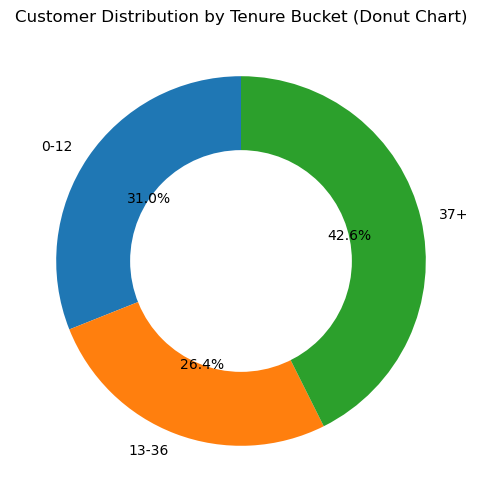

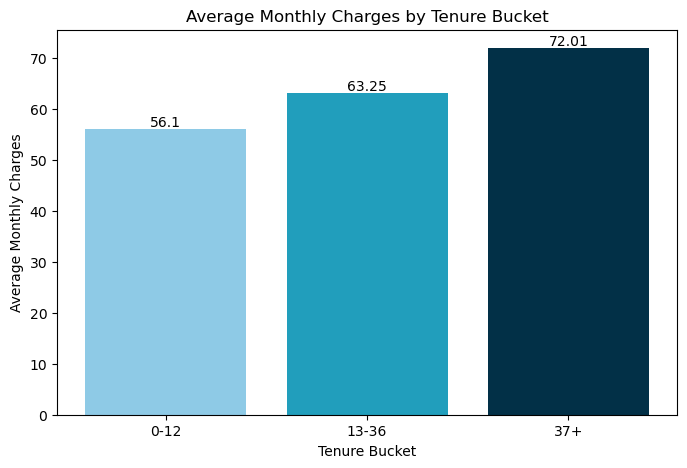

In [4]:
import matplotlib.pyplot as plt

# Donut chart for tenure distribution
tenure_counts = clean['tenure_bucket'].value_counts().reindex(['0-12','13-36','37+']).fillna(0)

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    tenure_counts.values,
    labels=tenure_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
centre_circle = plt.Circle((0,0),0.60,fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Customer Distribution by Tenure Bucket (Donut Chart)")
plt.show()

# Clustered bar chart: Average monthly charges by tenure bucket
avg_monthly = (
    clean.groupby('tenure_bucket', observed=False)['monthlycharges']
    .mean()
    .reindex(['0-12', '13-36', '37+'])
)

plt.figure(figsize=(8,5))
bars = plt.bar(avg_monthly.index, avg_monthly.values, color=['#8ecae6','#219ebc','#023047'])
plt.title("Average Monthly Charges by Tenure Bucket")
plt.xlabel("Tenure Bucket")
plt.ylabel("Average Monthly Charges")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+0.5, round(yval,2), ha='center')

plt.show()


# TASK 5: Advanced Analysis

In [6]:

import pandas as pd

# Load cleaned dataset if not already available
try:
    clean
except NameError:
    clean = pd.read_csv("cleaned_telco.csv")
    print("Cleaned dataset loaded successfully!")

# Grouped statistics by tenure bucket
group_stats = (
    clean.groupby('tenure_bucket', observed=False)
    .agg(
        customers=('customerid', 'count'),
        avg_monthly_charges=('monthlycharges', 'mean'),
        median_total_charges=('totalcharges', 'median'),
        churn_rate=('churn', lambda x: (x == 'Yes').mean())
    )
    .reset_index()
)

print(" Grouped Statistics by Tenure Bucket:")
print(group_stats)

# Save to CSV (optional)
group_stats.to_csv("group_stats_by_tenure.csv", index=False)
print("\nFile saved as: 'group_stats_by_tenure.csv'")

# Churn rate by demographic attributes
for col in ['gender', 'seniorcitizen', 'paymentmethod', 'contract']:
    if col in clean.columns:
        churn_rate = (
            clean.groupby(col, observed=False)['churn']
            .apply(lambda x: (x == 'Yes').mean())
            .reset_index()
            .rename(columns={'churn': 'churn_rate'})
        )
        print(f"\n Churn Rate by {col}:")
        print(churn_rate)



 Grouped Statistics by Tenure Bucket:
  tenure_bucket  customers  avg_monthly_charges  median_total_charges  \
0          0-12       2186            56.097781               174.550   
1         13-36       1856            63.248195              1404.975   
2           37+       3001            72.008730              4282.400   

   churn_rate  
0    0.474382  
1    0.255388  
2    0.119294  

File saved as: 'group_stats_by_tenure.csv'

 Churn Rate by gender:
   gender  churn_rate
0  Female    0.269209
1    Male    0.261603

 Churn Rate by seniorcitizen:
   seniorcitizen  churn_rate
0              0    0.236062
1              1    0.416813

 Churn Rate by paymentmethod:
               paymentmethod  churn_rate
0  Bank transfer (automatic)    0.167098
1    Credit card (automatic)    0.152431
2           Electronic check    0.452854
3               Mailed check    0.191067

 Churn Rate by contract:
         contract  churn_rate
0  Month-to-month    0.427097
1        One year    0.112695
2